In [1]:
%load_ext autoreload
%autoreload 2

# Exploration and visualization generated with `diff-gather-stats` script

This notebook examines results of running the `diff-gather-stats` script,
generated from the [`gather_data.py`](../src/diffannotator/gather_data.py)
source file.

The exploration would involve various open source projects repositories.

The list of different example repositories is taken from the
[GitVision app demo site](https://gitvis.web.app/).

- Large repositories:
  - [TensorFlow](https://github.com/tensorflow/tensorflow): A comprehensive machine learning library by Google<br>
    This repo provides a great example of a large, complex open-source project with a very active community.
  - ...

## TensorFlow repository

This repository was cloned with
```commandline
git clone https://github.com/tensorflow/tensorflow.git
```

### File purposes

> **NOTE:** the file from below should be put in the repository,
> in `data/`, or `data/examples/`, or `notebooks/data/`.

In [2]:
import json
from collections import Counter, defaultdict

The annotation data was generated from the `tensorflow` repository with the following command:
```commandline
diff-annotate from-repo \
    --output-dir=~/example_annotations/tensorflow/ezhulenev/ \
    ~/example_repositories/tensorflow/ \
    --author=ezhulenev@google.com
```

This generates annotations in the "flat" format.

To make them compatibile with "hierarchical" / "bugsinpy" format that `diff-gather-stats` script expects
you need to create `annotation/` directory in each of "bug" directories, and move `*.json` files there:
```commandline
cd ~/example_annotations/tensorflow/ezhulenev/
mkdir annotation
mv *.json annotation/
```

The statistics in `tensorflow.purpose-per-file.json` file were generated with the following command:
```commandline
diff-gather-stats purpose-per-file \
    ~/example_annotations/tensorflow.purpose-per-file.json \
    ~/example_annotations/tensorflow/
```

In [3]:
with open('/home/jnareb/example_annotations/tensorflow.purpose-per-file.json', mode='r') as json_fp:
    tf_ezhulenev_per_file_data = json.load(json_fp)

In [4]:
#tf_ezhulenev_per_file_data

{'tensorflow': {'ezhulenev': {'0e8cbd4649c244488b405613b756d73bded030c9.json': {'tensorflow/core/kernels/eigen_contraction_kernel.h': ['programming'],
    'tensorflow/workspace.bzl': ['programming']},
   'ea7f22aa0b7bede312bcdea0304a69e5793b46a2.json': {'third_party/xla/xla/service/gpu/BUILD': ['project'],
    'third_party/xla/xla/service/gpu/backend_configs.proto': ['data'],
    'third_party/xla/xla/service/gpu/hlo_fusion_analysis.cc': ['programming'],
    'third_party/xla/xla/service/gpu/hlo_fusion_analysis.h': ['programming'],
    'third_party/xla/xla/service/gpu/ir_emission_utils.h': ['programming'],
    'third_party/xla/xla/service/gpu/ir_emitter_unnested.cc': ['programming'],
    'third_party/xla/xla/service/gpu/ir_emitter_unnested.h': ['programming'],
    'third_party/xla/xla/service/gpu/kernel_thunk.cc': ['programming'],
    'third_party/xla/xla/service/gpu/kernel_thunk.h': ['programming'],
    'third_party/xla/xla/service/gpu/kernels/BUILD': ['project'],
    '/dev/null': ['oth

In [5]:
# There is only one "dataset", and only one "bug"
ezhulenev_per_file_data = tf_ezhulenev_per_file_data['tensorflow']['ezhulenev']

ezhulenev_records = []
for patch_name, patch_data in ezhulenev_per_file_data.items():
    for file_name, purposes in patch_data.items():
        if file_name == '/dev/null':
            continue

        record = {
            'patchname': patch_name.removesuffix('.json'),
            'filename': file_name,
        }
        purpose_counter = Counter()
        
        for p in purposes:
            purpose_counter[p] += 1

        record.update(dict(purpose_counter))

        ezhulenev_records.append(record)

In [6]:
# show example
ezhulenev_records[:10]

[{'patchname': '0e8cbd4649c244488b405613b756d73bded030c9',
  'filename': 'tensorflow/core/kernels/eigen_contraction_kernel.h',
  'programming': 1},
 {'patchname': '0e8cbd4649c244488b405613b756d73bded030c9',
  'filename': 'tensorflow/workspace.bzl',
  'programming': 1},
 {'patchname': 'ea7f22aa0b7bede312bcdea0304a69e5793b46a2',
  'filename': 'third_party/xla/xla/service/gpu/BUILD',
  'project': 1},
 {'patchname': 'ea7f22aa0b7bede312bcdea0304a69e5793b46a2',
  'filename': 'third_party/xla/xla/service/gpu/backend_configs.proto',
  'data': 1},
 {'patchname': 'ea7f22aa0b7bede312bcdea0304a69e5793b46a2',
  'filename': 'third_party/xla/xla/service/gpu/hlo_fusion_analysis.cc',
  'programming': 1},
 {'patchname': 'ea7f22aa0b7bede312bcdea0304a69e5793b46a2',
  'filename': 'third_party/xla/xla/service/gpu/hlo_fusion_analysis.h',
  'programming': 1},
 {'patchname': 'ea7f22aa0b7bede312bcdea0304a69e5793b46a2',
  'filename': 'third_party/xla/xla/service/gpu/ir_emission_utils.h',
  'programming': 1},
 {'

> **NOTE:** imports should be moved to the preamble, or at the top of notebook

In [37]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [8]:
# debug
pd.DataFrame.from_dict({'idx_1': {'col_1': 1, 'col_2': 2}, 'idx_2': {'col_1': 11, 'col_2': 22}}, orient='index')

,col_1,col_2
idx_1,1,2
idx_2,11,22


In [13]:
ezhulenev_df = pd.DataFrame.from_records(ezhulenev_records).fillna(0).convert_dtypes()

In [14]:
ezhulenev_df

,patchname,filename,programming,project,data,test,other,documentation,markup
0,0e8cbd4649c244488b405613b756d73bded030c9,tensorflow/core/kernels/eigen_contraction_kern...,1,0,0,0,0,0,0
1,0e8cbd4649c244488b405613b756d73bded030c9,tensorflow/workspace.bzl,1,0,0,0,0,0,0
2,ea7f22aa0b7bede312bcdea0304a69e5793b46a2,third_party/xla/xla/service/gpu/BUILD,0,1,0,0,0,0,0
3,ea7f22aa0b7bede312bcdea0304a69e5793b46a2,third_party/xla/xla/service/gpu/backend_config...,0,0,1,0,0,0,0
4,ea7f22aa0b7bede312bcdea0304a69e5793b46a2,third_party/xla/xla/service/gpu/hlo_fusion_ana...,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...
10193,422bd16858138f711c2672cd8a8b98ac07d5a18c,third_party/xla/xla/service/cpu/cpu_compiler.cc,1,0,0,0,0,0,0
10194,422bd16858138f711c2672cd8a8b98ac07d5a18c,third_party/xla/xla/service/cpu/cpu_executable.h,1,0,0,0,0,0,0
10195,a4e0c1111c3640366a5d7593444a31227a6b2811,third_party/xla/xla/ffi/api/api.h,1,0,0,0,0,0,0
10196,1b59fa8fa22b59c485b5b26c942bbb7622b0d62d,tensorflow/compiler/xla/primitive_util.cc,1,0,0,0,0,0,0


In [19]:
ezhulenev_per_commit_df = ezhulenev_df.groupby('patchname')[['programming','data','test','project','documentation','markup','other']].sum()
ezhulenev_per_commit_df

,programming,data,test,project,documentation,markup,other
patchname,,,,,,,
0024f5d08dff98bd78ed48f5a46226d048583be7,3,0,0,1,0,0,0
003ab23a4dfc645eb9d41b9d0fc0c98a8ca3b73d,5,0,0,0,0,0,0
00652e6e6a0ffb9c60a21ac91680bc1ac5528bc4,22,0,0,2,0,0,0
0071c1738eb5248fe9993bc7e437fa63e3a17742,1,0,0,0,0,0,0
007eb8a5b793ecbaa648b2e894df4f4c846a6156,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...
ff3da2b31150f2dca37cfa1aff72418c6a89550f,1,0,0,0,0,0,0
ff3db2d32584175c67c11a2be36b54170bae473d,1,0,1,0,0,0,0
ffac1f66df235e8876d1140d2b37af6cc80ed890,4,0,0,0,0,0,0


In [29]:
ezhulenev_per_commit_df.describe()

,programming,data,test,project,documentation,markup,other
count,1895.0,1895.0,1895.0,1895.0,1895.0,1895.0,1895.0
mean,3.556728,0.026913,0.967282,0.702902,0.017414,0.000528,0.109763
std,6.46049,0.205041,2.752744,1.207538,0.159899,0.022972,0.474909
min,0.0,0.0,0.0,0.0,0.0,0.0,0.0
25%,1.0,0.0,0.0,0.0,0.0,0.0,0.0
50%,2.0,0.0,0.0,0.0,0.0,0.0,0.0
75%,4.0,0.0,1.0,1.0,0.0,0.0,0.0
max,128.0,5.0,63.0,13.0,4.0,1.0,6.0


In [30]:
ezhulenev_per_commit_df.sum()

programming      6740
data               51
test             1833
project          1332
documentation      33
markup              1
other             208
dtype: Int64

In [32]:
ezhulenev_per_commit_df.idxmax()

programming      fa114c7950632ef6f7800bfa5f9b95cbc3ea8577
data             65fd4e5b5d4c127ea46d90aaf38ebe32e57e80a8
test             05fff776d9069d1d19eaf5c9859770328ed143ea
project          cf5e85663fef097f83f5004f112ae42758e9b035
documentation    dd5b364dc0a6b994e678c2f2a9ea01771462d5e5
markup           9c20fbff6c251b05c15f2b4f840722c78bf38233
other            193470c58fa10e66c87aadc47a446f14913be10b
dtype: string

In [33]:
# sanity check for idxmax for 'project' files
ezhulenev_per_file_data['cf5e85663fef097f83f5004f112ae42758e9b035.json']

{'tensorflow/c/experimental/stream_executor/BUILD': ['project'],
 'tensorflow/python/BUILD': ['project'],
 'third_party/xla/xla/backends/interpreter/BUILD': ['project'],
 'third_party/xla/xla/client/BUILD': ['project'],
 'third_party/xla/xla/mlir/backends/gpu/BUILD': ['project'],
 'third_party/xla/xla/service/BUILD': ['project'],
 'third_party/xla/xla/service/cpu/BUILD': ['project'],
 'third_party/xla/xla/service/gpu/tests/BUILD': ['test'],
 'third_party/xla/xla/stream_executor/BUILD': ['project'],
 'third_party/xla/xla/stream_executor/cuda/BUILD': ['project'],
 'third_party/xla/xla/stream_executor/gpu/BUILD': ['project'],
 'third_party/xla/xla/stream_executor/host/BUILD': ['project'],
 'third_party/xla/xla/stream_executor/rocm/BUILD': ['project'],
 'third_party/xla/xla/translate/mhlo_to_lhlo_with_xla/BUILD': ['project'],
 'third_party/xla/xla/xla.bzl': ['programming']}

In [34]:
# sanity check for idxmax for 'markup' files
ezhulenev_per_file_data['9c20fbff6c251b05c15f2b4f840722c78bf38233.json']

{'tensorflow/compiler/mlir/lite/tf_tfl_passes.cc': ['programming'],
 'tensorflow/compiler/mlir/lite/transforms/quantize_patterns.td': ['other'],
 'tensorflow/compiler/mlir/tensorflow/ir/tf_ops.td': ['other'],
 'tensorflow/compiler/mlir/tensorflow/ir/tf_ops_a_m.cc': ['programming'],
 'tensorflow/compiler/mlir/tensorflow/ir/tf_ops_helpers.inc': ['markup'],
 'tensorflow/compiler/mlir/tensorflow/tests/canonicalize.mlir': ['test'],
 'tensorflow/compiler/mlir/tensorflow/tests/tf_saved_model/control_flow_upgrade_legacy_v1.py': ['test']}

In [39]:
ezhulenev_per_commit_df.replace(0, np.nan).median()

programming      2.0
data             1.0
test             1.0
project          1.0
documentation    1.0
markup           1.0
other            1.0
dtype: Float64

<Axes: ylabel='Frequency'>

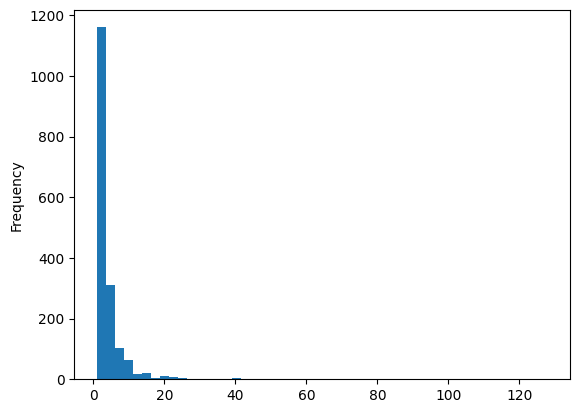

In [40]:
plt.figure();

ezhulenev_per_commit_df['programming'].replace(0, np.nan).plot.hist(bins=50)

<Axes: ylabel='Frequency'>

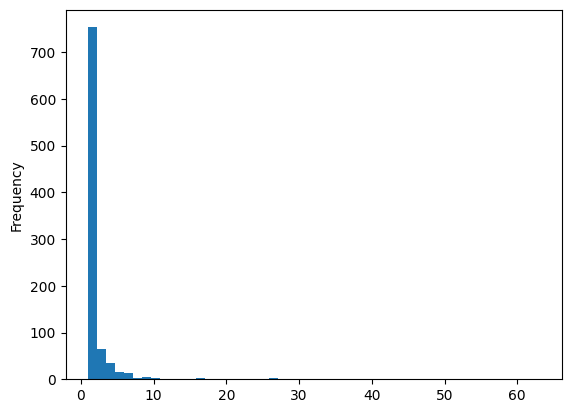

In [41]:
ezhulenev_per_commit_df['test'].replace(0, np.nan).plot.hist(bins=50)

<Axes: ylabel='Frequency'>

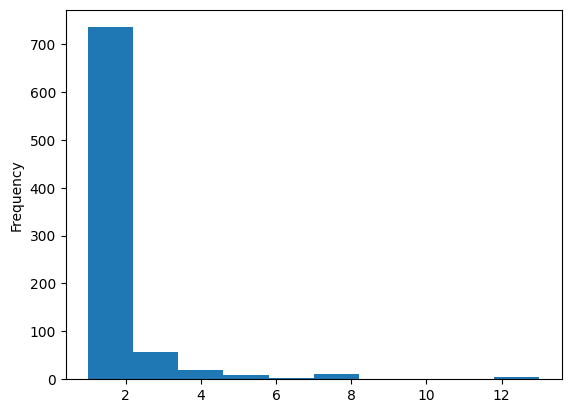

In [43]:
ezhulenev_per_commit_df['project'].replace(0, np.nan).plot.hist()